# Введение
*Цель работы*: изучение алгоритмов и методов кластеризации на практике.

*Вариант 1 (16)*:

Файл `medical_diagnosis.csv` содержит информацию о болезнях
- age — возраст пациента (лет), числовой.
- sex — пол: Male / Female, категориальный.
- BMI — индекс массы тела (кг/м²), числовой.
- systolic_bp — систолическое артериальное давление, мм рт. ст., числовой.
- cholesterol_mg_dl — общий холестерин сыворотки, мг/дл, числовой.
- fasting_glucose_mg_dl — глюкоза крови натощак, мг/дл, числовой.
- smoking_status — статус курения: Never / Former / Current, категориальный.
- family_history — наследственность по заболеванию: Yes / No, категориальный.
- activity_level — уровень физической активности: Low / Moderate / High, категориальный.
- symptom_score — суммарная выраженность симптомов (0–10), числовой.
- CRP_mg_L — C-реактивный белок, мг/л (маркер воспаления), числовой.
- WBC_10e9_L — лейкоциты, ×10⁹/л, числовой.
- ECG_result — результат ЭКГ: Normal / ST-T abnormality / LVH, категориальный.
- Disease — **целевой класс**: 1 — болеет, 0 — не болеет.

# 1 часть

Задача кластеризации — разбиение датасета на непересекающиеся группы (кластеры) без предварительного обучения.
Кластеризация в первой части проводится с использованием метода k средних (KMeans), который предполагает, что кол-во
кластеров известно заранее.  

В первой части рассмотрена кластеризация набора данных с заранее продуманной кластерной структурой —
для создания датасета первой части использована функция, приведённая в методических материалах.
Датасетом в первой части являются координаты точек на плоскости, которые формируют три кластера.
В этом можно убедиться, нанеся точки на график.

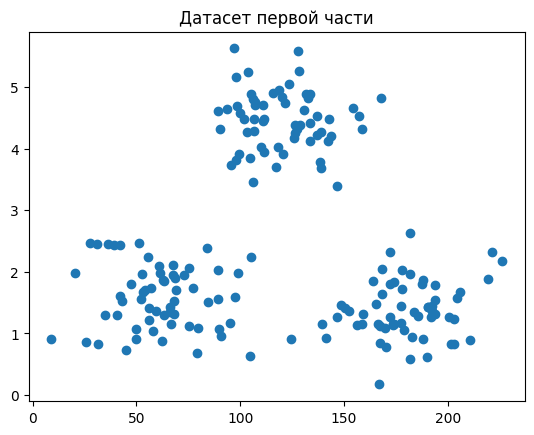

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def make_data(n, seed):
    np.random.seed(seed)
    shift_matrix = np.array([[3, 3],
    [6, 9],
    [9, 3]])
    data = np.random.randn(3, 2, n) + shift_matrix.reshape((3, 2, 1))
    data = np.swapaxes(data, 1, 2)
    data = data.reshape((-1, 2))
    data *= np.array([[20, 0.5]])
    df = pd.DataFrame({'x': data[:, 0], 'y': data[:, 1]},
    columns=['x', 'y'])
    df = df.sample(frac=1.0)
    return df

df = make_data(60, 0)
plt.scatter(df.x,df.y)
plt.title("Датасет первой части")
plt.show()

Во входных данных нет целевого признака — метки кластера, его нужно вычислить самостоятельно.

Сначала координаты приводятся к стандартному виду при помощи объекта `StandardScaler`,чтобы повысить точность кластеризации.
Затем создаётся объект `KMeans` с количеством кластеров, равным 3. При помощи метода `fit_predict()` он одновременно тренируется на входных данных и возвращает метки кластеров для них. Метки сохраняются в переменной `clusters`.

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

k_means = KMeans(n_clusters=3, random_state=0)
clusters = k_means.fit_predict(df_scaled)

Далее идёт визуализация кластеров. Для нанесения точек на график и цветового разделения по кластерам используется функция `scatterplot` библиотеки `seaborn` с параметром `hue`, в который передаются метки кластеров.

Координаты центров кластеров хранятся в поле `cluster_centers_` объекта `KMeans`, но эти координаты стандартизированы, поэтому нужно обратить их стандартизацию, используя метод `inverse_transform()` ранее созданного объекта `StandardScaler`. Была создана вспомогательная функция `get_centers`, которая выполняет всё перечисленное, а также транспонирует двумерный массив координат для удобства использования в графиках. На графике центры кластеров отмечены жёлтым цветом.

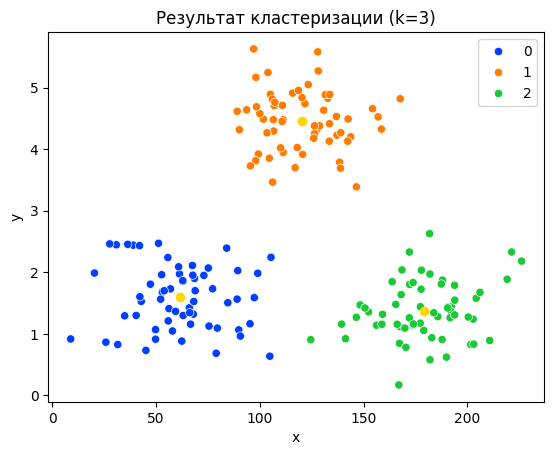

In [3]:
from sklearn.cluster import KMeans
import seaborn as sbn
import matplotlib.pyplot as plt

def get_centers(k_means):
    return scaler.inverse_transform(k_means.cluster_centers_).transpose()

centers = get_centers(k_means)
sbn.scatterplot(x=df.x, y=df.y, hue=clusters, palette="bright")
plt.scatter(centers[0],centers[1],c='gold')
plt.title("Результат кластеризации (k=3)")
plt.show()

Видим, что разделение на кластеры соответствует ожиданиям, объекты каждого кластера распределены достаточно равномерно вокруг центров.

Для каждой из точек можно подсчитать коэффициент силуэта — насколько она похожа на другие точки своего кластера.
Если точка ближе к точкам своего кластера, чем к точкам других кластеров, то силуэт больше 0,
а значения близкие к 1 говорят о хорошей кластеризации.

Силуэт выборки – средняя величина силуэта объектов данной выборки, и показывает, насколько хорошо была выполнена
кластеризация в целом, а не только отдельных объектов. Для вычисления силуэта выборки использована функция `silhouette_score()` пакета `sklearn`, которая принимает входные данные на кластеризацию и метки кластеров.

In [4]:
from sklearn.metrics import silhouette_score
silhouette_score(df_scaled, clusters)

0.6995782327658537

Силуэт выборки близок к 1, что свидетельствует о качественной кластеризации.

Далее выполнена кластеризация того же датасета с другим количесвом кластеров — 2 и 4. Ниже можно увидеть графики получившихся кластеризаций, а также коэффициенты силуэта.

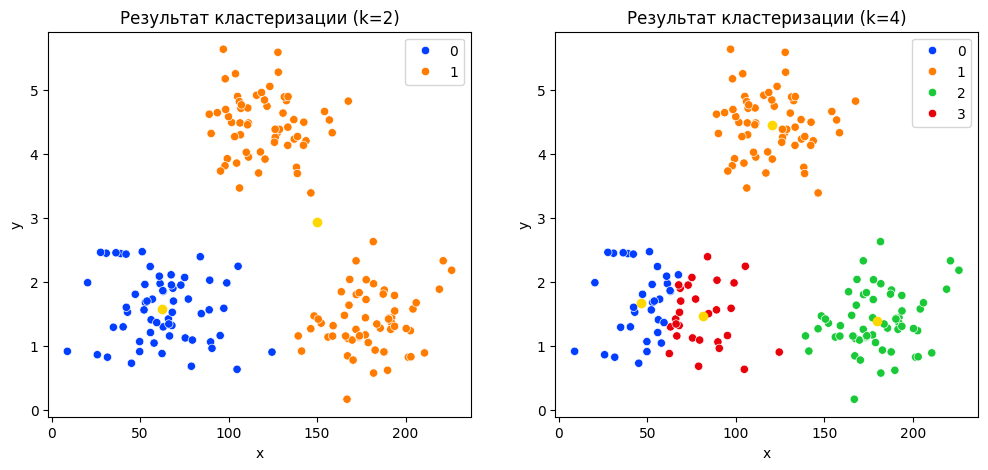

Коэффициент силуэта
k=2: 0.45181730581610663
k=4: 0.5572400215178079


In [5]:
k_means2 = KMeans(n_clusters=2, random_state=0)
k_means4 = KMeans(n_clusters=4, random_state=0)
clusters2 = k_means2.fit_predict(df_scaled)
clusters4 = k_means4.fit_predict(df_scaled)

_, ax = plt.subplots(1,2, figsize=(12,5))
centers2 = get_centers(k_means2)
sbn.scatterplot(x=df.x, y=df.y, hue=clusters2, palette="bright", ax=ax[0])
ax[0].scatter(centers2[0],centers2[1],c='gold')
ax[0].set_title("Результат кластеризации (k=2)")

centers4 = get_centers(k_means4)
sbn.scatterplot(x=df.x, y=df.y, hue=clusters4, palette="bright", ax=ax[1])
ax[1].scatter(centers4[0],centers4[1],c='gold')
ax[1].set_title("Результат кластеризации (k=4)")
plt.show()

print("Коэффициент силуэта")
print("k=2:",silhouette_score(df_scaled, clusters2))
print("k=4:",silhouette_score(df_scaled, clusters4))

Видим, что при двух кластерах два из трёх бывших кластеров *объединились* в один, а при четырёх один *разделился* на два. Причём при запусках с разным `random_state` кластеризатора объединиться и разделиться могут разные кластеры. Коэффициенты силуэтов ниже, чем при трёх кластерах, но всё ещё больше нуля. Исходя из этого, использование трёх кластеров остаётся предпочтительнее для данной задачи.

Также для определения наилучшего количества классов использован "метод локтя".
Он заключается в том, что нужно найти точку, где изменение инерции — суммы квадратов расстояний между точками
и центроидами кластеров — перестает значительно меняться. На графике ниже показано значение инерции
для всех k от 1 до 9 и жёлтым отмечен "локоть" — оптимальное количество кластеров. 

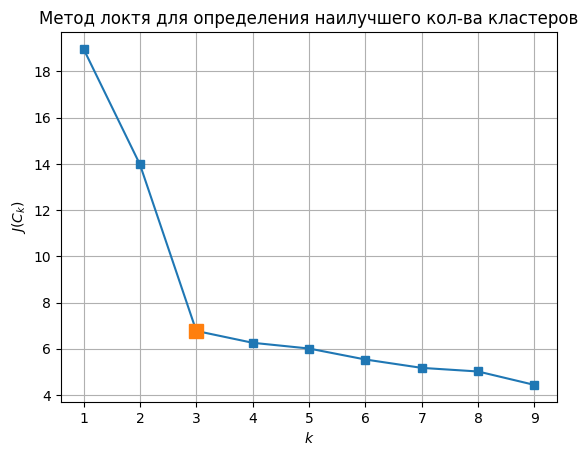

In [6]:
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(df_scaled)
    inertia.append(np.sqrt(kmeans.inertia_))

plt.plot(range(1,10), inertia, marker='s');
plt.plot(3,inertia[2], marker='s', ms=10)
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$');
plt.grid(True)
plt.title("Метод локтя для определения наилучшего кол-ва кластеров")
plt.show()

Видим, что после k = 3 значительно уменьшился темп снижения инерции, это говорит о том, что для кластеризации
в даной задаче лучше всего подходят всё же три кластера. 

# 2 часть

## Предобработка

Для решения задачи кластеризации второй части был использован датасет `medical_diagnosis.csv`, в котором указаны данные о пациентах и их болезни. Датасет был проанализирован при помощи методов `info()` и `describe()`.

In [7]:
patients_df = pd.read_csv("medical_diagnosis.csv")
patients_df

,age,sex,BMI,systolic_bp,cholesterol_mg_dl,fasting_glucose_mg_dl,smoking_status,family_history,activity_level,symptom_score,CRP_mg_L,WBC_10e9_L,ECG_result,Disease
0,34,Male,16.8,132.0,196.0,78.0,Current,No,High,0.2,0.58,8.60,Normal,0
1,24,Female,29.2,118.0,182.0,96.0,Current,No,Moderate,3.2,2.72,6.54,Normal,0
2,19,Female,16.5,121.0,268.0,101.0,Current,No,Moderate,3.8,0.18,6.61,Normal,0
3,89,Female,15.4,117.0,136.0,96.0,Never,No,Low,2.6,1.83,5.67,Normal,0
4,66,Male,16.7,82.0,241.0,126.0,Former,No,Moderate,3.5,1.16,2.66,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3026,40,Female,27.8,119.0,503.4,102.0,Current,No,Moderate,0.0,24.48,7.80,ST-T abnormality,0
3027,57,Female,15.2,158.0,512.4,115.0,Never,Yes,Low,3.1,24.27,6.51,LVH,0
3028,41,Male,19.7,133.0,433.2,56.0,Former,Yes,Moderate,0.0,20.35,8.20,Normal,0
3029,75,Male,30.4,94.0,487.2,75.0,Former,No,Moderate,1.4,33.09,8.11,Normal,0


In [8]:
patients_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3031 entries, 0 to 3030
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    3031 non-null   int64  
 1   sex                    3031 non-null   object 
 2   BMI                    3031 non-null   float64
 3   systolic_bp            3031 non-null   float64
 4   cholesterol_mg_dl      3031 non-null   float64
 5   fasting_glucose_mg_dl  3031 non-null   float64
 6   smoking_status         3031 non-null   object 
 7   family_history         3031 non-null   object 
 8   activity_level         3031 non-null   object 
 9   symptom_score          3031 non-null   float64
 10  CRP_mg_L               3031 non-null   float64
 11  WBC_10e9_L             3031 non-null   float64
 12  ECG_result             3031 non-null   object 
 13  Disease                3031 non-null   int64  
dtypes: float64(7), int64(2), object(5)
memory usage: 331.6+ 

In [9]:
patients_df.describe()

,age,BMI,systolic_bp,cholesterol_mg_dl,fasting_glucose_mg_dl,symptom_score,CRP_mg_L,WBC_10e9_L,Disease
count,3031.000000,3031.000000,3031.000000,3031.000000,3031.000000,3031.000000,3031.000000,3031.000000,3031.000000
mean,53.176509,26.465886,122.417684,202.744903,94.366216,2.040185,1.380625,6.825094,0.016166
std,20.740090,5.869822,17.859825,53.735636,19.547096,1.357714,3.159757,1.980929,0.126136
min,18.000000,13.500000,82.000000,85.000000,56.000000,0.000000,0.100000,2.300000,0.000000
25%,35.000000,22.500000,110.000000,171.000000,80.500000,1.000000,0.100000,5.480000,0.000000
50%,53.000000,26.300000,122.000000,200.000000,94.000000,2.000000,0.520000,6.750000,0.000000
75%,71.000000,30.400000,134.000000,232.000000,107.000000,3.000000,1.460000,8.150000,0.000000
max,89.000000,50.900000,184.000000,658.200000,163.000000,6.800000,43.450000,13.720000,1.000000


Ни в каких столбцах нет нулевых значений, числовые типы (целые и вещественные числа) присуждены столбцам корректно.
Почти во всех столбцах не наблюдается выбросов.
В столбце `CRP_mg_L` (кол-во C-реактивного белка в крови, мг/л) максимальное значение похоже на выброс,
но такое значение действительно может достигаться при болезни.

Далее были рассмотрены категориальные столбцы на предмет неявных дубликатов.

In [10]:
cats = patients_df.select_dtypes(include=object).columns.to_list()

for c in cats:
    print(c, patients_df[c].unique())
print("Disease", patients_df.Disease.unique())

sex ['Male' 'Female']
smoking_status ['Current' 'Never' 'Former']
family_history ['No' 'Yes']
activity_level ['High' 'Moderate' 'Low']
ECG_result ['Normal' 'ST-T abnormality' 'LVH']
Disease [0 1]


Ни в каких категориальных столбцах нет неявных дубликатов, а значит их сразу можно преобразовать
в категориальные типы.

In [11]:
for c in cats:
    patients_df[c] = pd.Categorical(patients_df[c])

patients_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3031 entries, 0 to 3030
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   age                    3031 non-null   int64   
 1   sex                    3031 non-null   category
 2   BMI                    3031 non-null   float64 
 3   systolic_bp            3031 non-null   float64 
 4   cholesterol_mg_dl      3031 non-null   float64 
 5   fasting_glucose_mg_dl  3031 non-null   float64 
 6   smoking_status         3031 non-null   category
 7   family_history         3031 non-null   category
 8   activity_level         3031 non-null   category
 9   symptom_score          3031 non-null   float64 
 10  CRP_mg_L               3031 non-null   float64 
 11  WBC_10e9_L             3031 non-null   float64 
 12  ECG_result             3031 non-null   category
 13  Disease                3031 non-null   int64   
dtypes: category(5), float64(7), int64(2)
mem

Далее весь датасет был проверен на наличие явных дубликатов. Проверка выявила только одного дублированного пациента, в датафрейме это пациенты по индексам 3008 и 3024, один из экземпляров был удалён.

In [12]:
dup_patient = patients_df.duplicated(keep=False) # отметить первое появление тоже как дубликат
patients_df[dup_patient]

,age,sex,BMI,systolic_bp,cholesterol_mg_dl,fasting_glucose_mg_dl,smoking_status,family_history,activity_level,symptom_score,CRP_mg_L,WBC_10e9_L,ECG_result,Disease
3008,49,Female,27.5,133.0,438.6,91.0,Former,No,Moderate,1.9,25.04,12.61,Normal,0
3024,49,Female,27.5,133.0,438.6,91.0,Former,No,Moderate,1.9,25.04,12.61,Normal,0


In [13]:
patients_df = patients_df.drop_duplicates().reset_index(drop=True)
patients_df.tail(10)

,age,sex,BMI,systolic_bp,cholesterol_mg_dl,fasting_glucose_mg_dl,smoking_status,family_history,activity_level,symptom_score,CRP_mg_L,WBC_10e9_L,ECG_result,Disease
3020,59,Female,17.3,115.0,622.2,90.0,Never,No,Moderate,2.2,25.355,5.71,LVH,0
3021,87,Male,24.4,120.0,492.6,74.0,Never,No,High,4.1,20.350,5.51,LVH,0
3022,27,Female,28.9,121.0,579.0,84.0,Former,No,Low,1.5,32.740,6.67,Normal,0
3023,69,Female,25.4,136.0,483.6,61.0,Current,No,Low,4.6,33.230,6.86,Normal,0
3024,65,Male,16.9,123.0,422.4,110.0,Never,No,Moderate,3.9,22.345,5.87,Normal,0
3025,40,Female,27.8,119.0,503.4,102.0,Current,No,Moderate,0.0,24.480,7.80,ST-T abnormality,0
3026,57,Female,15.2,158.0,512.4,115.0,Never,Yes,Low,3.1,24.270,6.51,LVH,0
3027,41,Male,19.7,133.0,433.2,56.0,Former,Yes,Moderate,0.0,20.350,8.20,Normal,0
3028,75,Male,30.4,94.0,487.2,75.0,Former,No,Moderate,1.4,33.090,8.11,Normal,0
3029,72,Male,21.8,102.0,602.4,77.0,Former,Yes,Moderate,2.1,28.890,5.49,Normal,0


## Диаграммы рассеяния

Целевым признаком является `Disease` — наличие болезни у пациента. Для кластеризации целевой признак в датафрейме не нужен, поэтому столбец с этим признаком был сохранён
в отдельной переменной `has_disease`, а в датафрейме он был отброшен.


In [14]:
has_disease = patients_df.Disease
patients_orig = patients_df.copy()
patients_df = patients_df.drop("Disease",axis=1)
patients_df

,age,sex,BMI,systolic_bp,cholesterol_mg_dl,fasting_glucose_mg_dl,smoking_status,family_history,activity_level,symptom_score,CRP_mg_L,WBC_10e9_L,ECG_result
0,34,Male,16.8,132.0,196.0,78.0,Current,No,High,0.2,0.58,8.60,Normal
1,24,Female,29.2,118.0,182.0,96.0,Current,No,Moderate,3.2,2.72,6.54,Normal
2,19,Female,16.5,121.0,268.0,101.0,Current,No,Moderate,3.8,0.18,6.61,Normal
3,89,Female,15.4,117.0,136.0,96.0,Never,No,Low,2.6,1.83,5.67,Normal
4,66,Male,16.7,82.0,241.0,126.0,Former,No,Moderate,3.5,1.16,2.66,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3025,40,Female,27.8,119.0,503.4,102.0,Current,No,Moderate,0.0,24.48,7.80,ST-T abnormality
3026,57,Female,15.2,158.0,512.4,115.0,Never,Yes,Low,3.1,24.27,6.51,LVH
3027,41,Male,19.7,133.0,433.2,56.0,Former,Yes,Moderate,0.0,20.35,8.20,Normal
3028,75,Male,30.4,94.0,487.2,75.0,Former,No,Moderate,1.4,33.09,8.11,Normal


После удаления целевого признака были построены диаграммы рассеяния с разделением больных и здоровых пациентов
по цвету. Для быстроты рендера показана только половина диаграмм ниже диагонали.

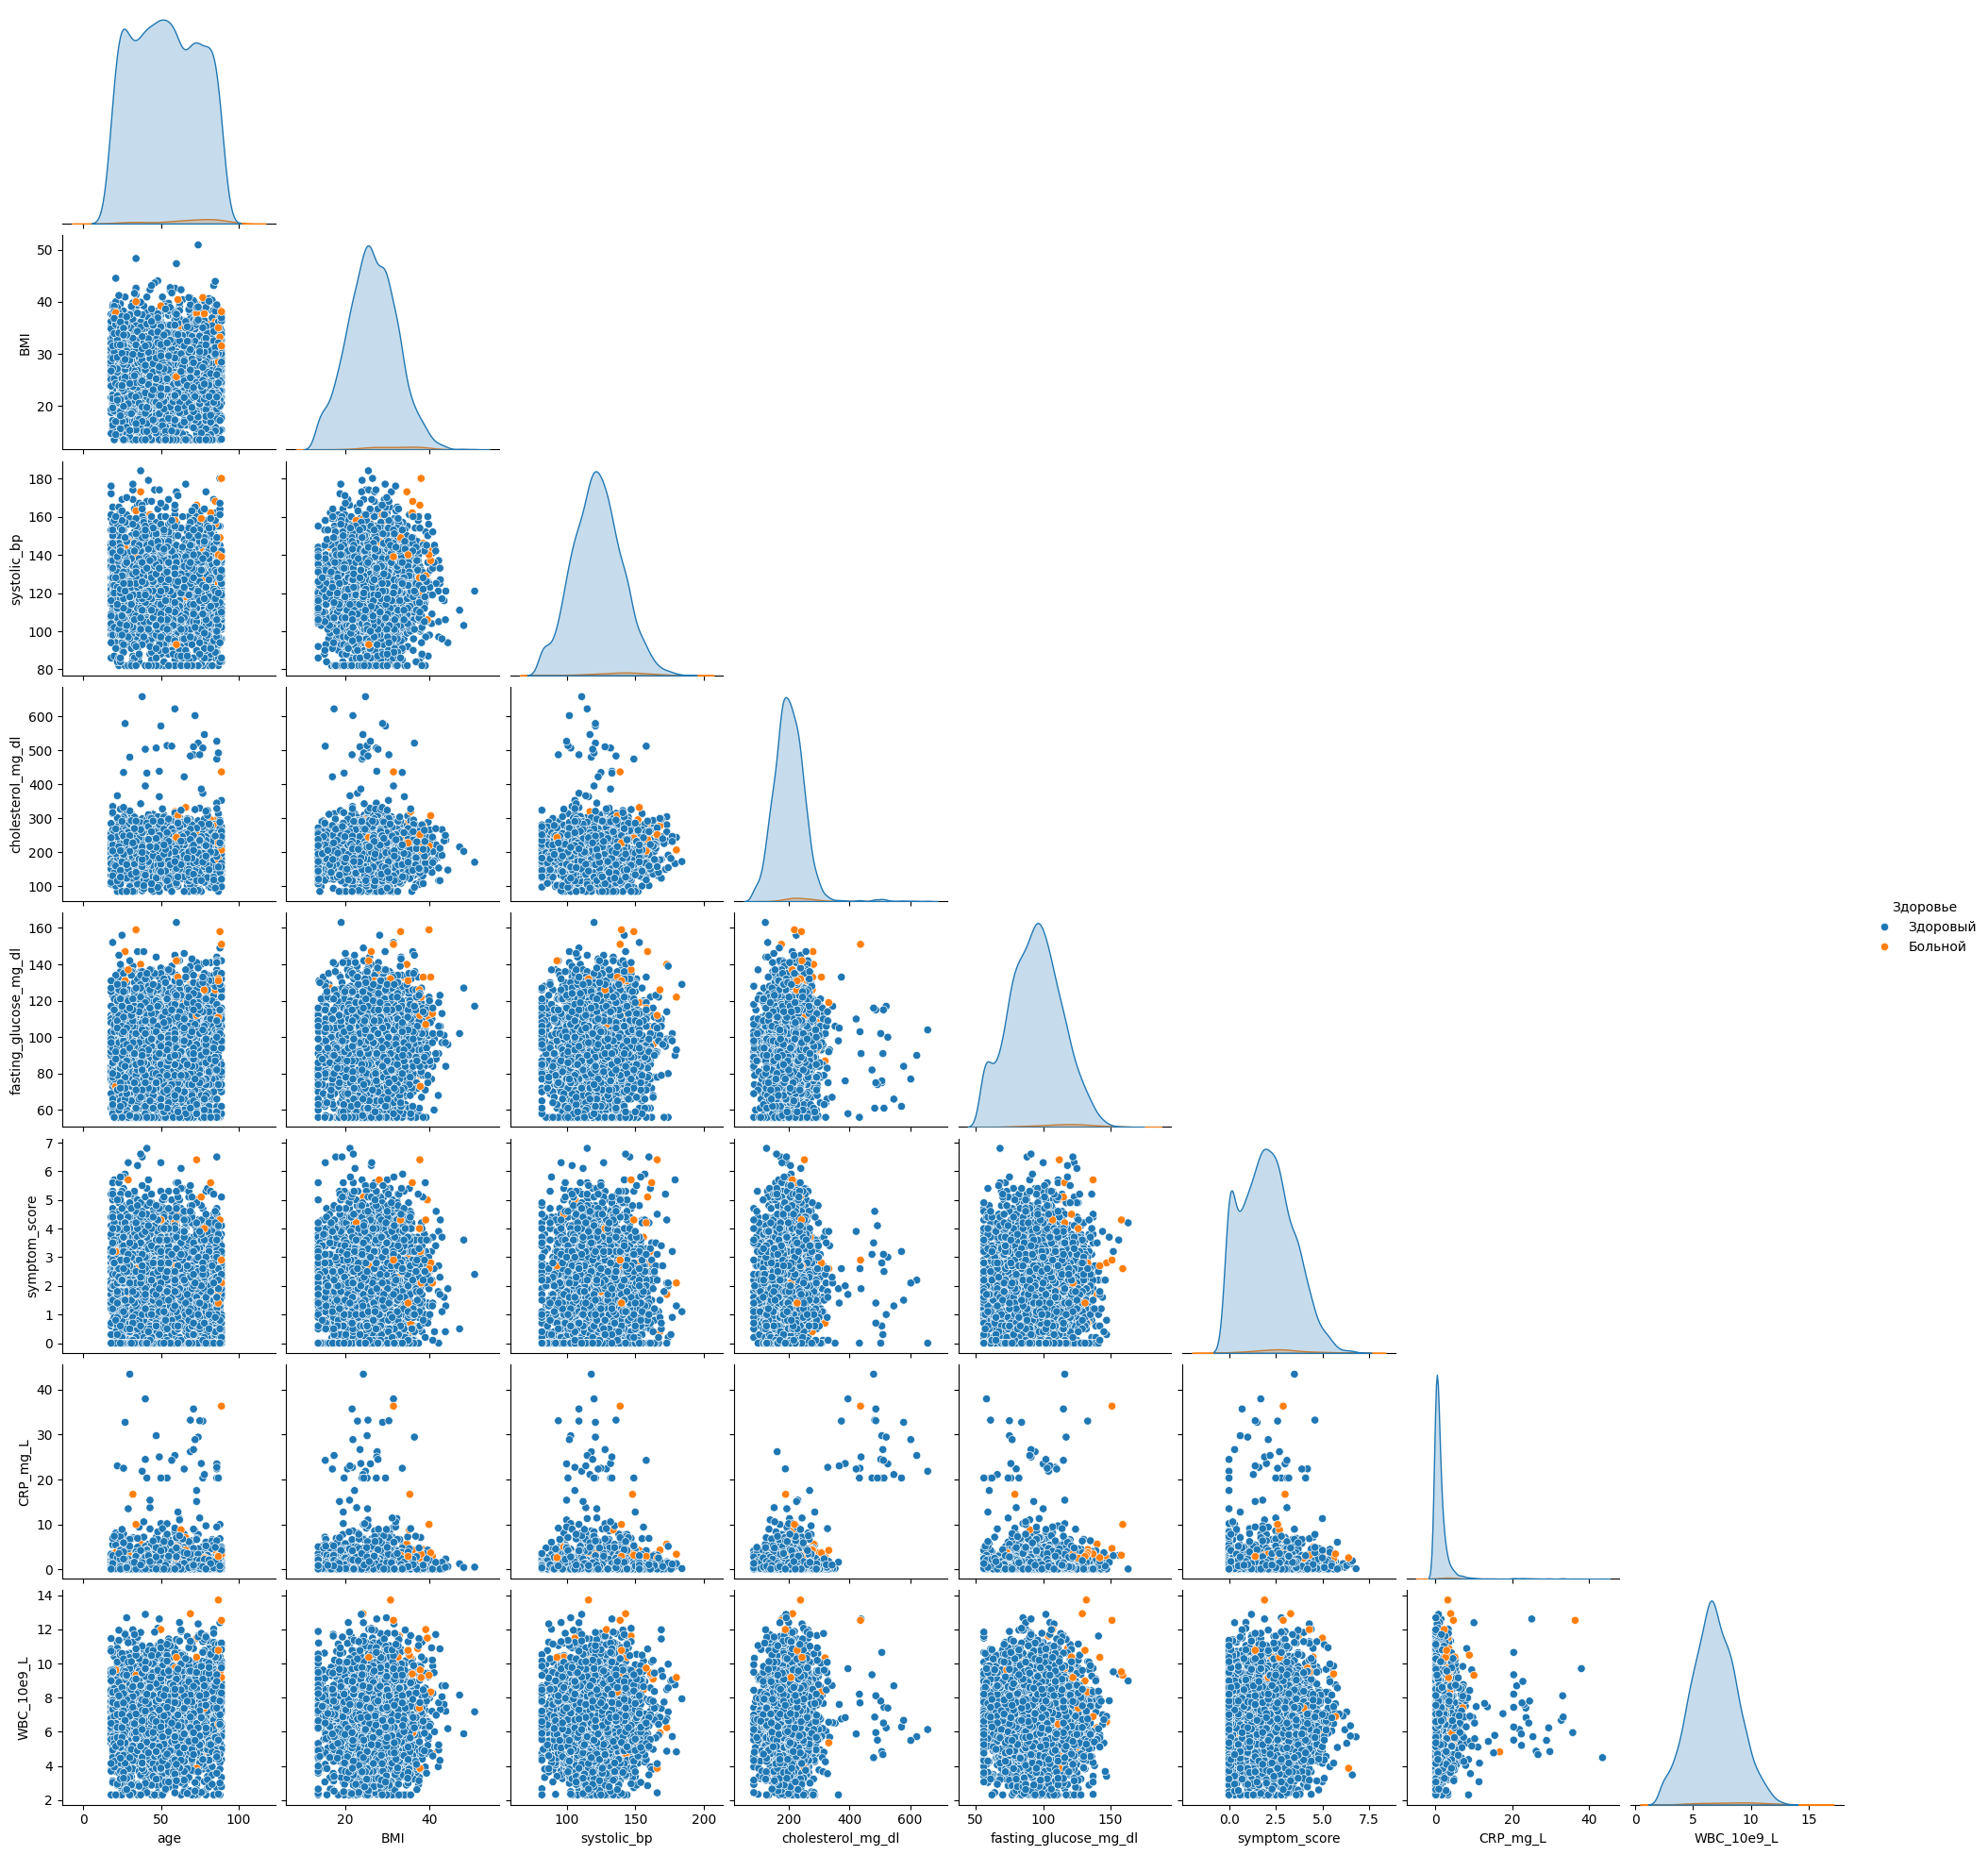

In [15]:
import seaborn as sbn

patients_labeled = patients_df.copy()
patients_labeled["Здоровье"] = has_disease.map({0: "Здоровый", 1:"Больной"})

sbn.pairplot(
    patients_labeled,
    hue="Здоровье",
    corner=True
)
plt.show()

Из диаграмм можно сделать следующие выводы:
- Больных значительно меньше, чем здоровых.
- Не наблюдается корреляции между какими-либо двумя признаками. 
- Распределение пациентов по возрасту близко к равномерному, по остальным признакам — к нормальному.
Однако в значениях холестерина и С-реактивного белка (`cholesterol_mg_dl` и `CRP_mg_L`) есть сильная асимметрия.
- Большинство больных имеют возраст около 75 лет.
- У большинства больных высокий уровень глюкозы и ИМТ (`fasting_glucose_mg_dl` и `BMI`),
но наличие этих значений ещё не говорит о наличии болезни.

Матрица диаграмм рассеяния показывает, что невозможно разделить элементы линейно на два класса, что мотивирует использование кластеризации и последующего анализа полученных групп.

## Подготовка к кластеризации

Перед кластеризацией численные столбцы были стандартизированы при помощи `StandardScaler()`, категориальные столбцы
были закодированы с использованием One-Hot Encoding.

In [16]:
num_cols = patients_df.select_dtypes(include='number').columns.tolist()
cat_cols = patients_df.select_dtypes(exclude='number').columns.tolist()

scaler = StandardScaler()
# стандартизация числовых столбцов
patients_df[num_cols] = scaler.fit_transform(patients_df[num_cols])
# прямая кодировка категориальных столбцов
patients_df = pd.get_dummies(patients_df, columns=cat_cols)
patients_df

,age,BMI,systolic_bp,cholesterol_mg_dl,fasting_glucose_mg_dl,symptom_score,CRP_mg_L,WBC_10e9_L,sex_Female,sex_Male,...,smoking_status_Former,smoking_status_Never,family_history_No,family_history_Yes,activity_level_High,activity_level_Low,activity_level_Moderate,ECG_result_LVH,ECG_result_Normal,ECG_result_ST-T abnormality
0,-0.924683,-1.646659,0.536756,-0.124468,-0.837332,-1.355391,-0.253266,0.898226,False,True,...,False,False,True,False,True,False,False,False,True,False
1,-1.406845,0.465852,-0.247172,-0.385835,0.083526,0.854208,0.430358,-0.143157,True,False,...,False,False,True,False,False,False,True,False,True,False
2,-1.647925,-1.697768,-0.079187,1.219706,0.339319,1.296128,-0.381046,-0.107770,True,False,...,False,False,True,False,False,False,True,False,True,False
3,1.727203,-1.885168,-0.303167,-1.244613,0.083526,0.412288,0.146047,-0.582965,True,False,...,False,True,True,False,False,True,False,False,True,False
4,0.618233,-1.663695,-2.262986,0.715641,1.618288,1.075168,-0.067984,-2.104597,False,True,...,True,False,True,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3025,-0.635387,0.227343,-0.191177,5.614410,0.390478,-1.502698,7.381598,0.493805,True,False,...,False,False,True,False,False,False,True,False,False,True
3026,0.184287,-1.919241,1.992622,5.782431,1.055542,0.780555,7.314513,-0.158323,True,False,...,False,True,False,True,False,True,False,True,False,False
3027,-0.587171,-1.152604,0.592751,4.303840,-1.962824,-1.502698,6.062268,0.696016,False,True,...,True,False,False,True,False,False,True,False,True,False
3028,1.052178,0.670289,-1.591048,5.311970,-0.990808,-0.471551,10.132066,0.650518,False,True,...,True,False,True,False,False,False,True,False,True,False


## Кластеризация методом k средних

Датасет готов к кластеризации, но необходимо выбрать оптимальное количество кластеров.
Для этого был использован "метод локтя", который показал, что оптимальным количеством кластеров будет 4. 

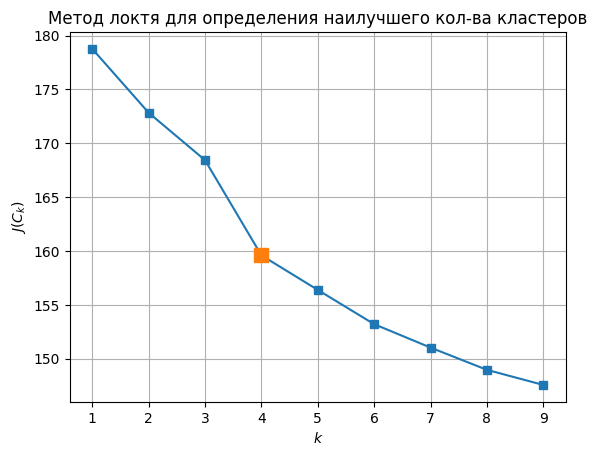

In [17]:
inertia = []
for k in range(1,10):
    kmeans = KMeans(
        n_clusters=k, random_state=1
    ).fit(patients_df)
    inertia.append(np.sqrt(kmeans.inertia_))

plt.plot(range(1,10), inertia, marker='s');
plt.plot(4,inertia[3], marker='s', ms=10)
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$');
plt.grid(True)
plt.title("Метод локтя для определения наилучшего кол-ва кластеров")
plt.show()

Когда стало известно оптимальное количество кластеров, была создана модель `KMeans`, и с её помощью
датасет был кластеризован. В переменной `patients_clusters` хранится результат вызова метода `fit_predict()`,
который тренируется и сразу же возвращает метки кластеров.

In [18]:
patients_k_means = KMeans(n_clusters=4, random_state=0)
patients_clusters = patients_k_means.fit_predict(patients_df)
patients_clusters

array([0, 1, 1, ..., 3, 3, 3], shape=(3030,), dtype=int32)

## Визуализация результатов

Результатом кластеризации стало разбиение датасета на четыре кластера, размеры которых приведены ниже.
Для каждого из них были подсчитаны средние показатели столбцов, а также количество отметок в категориальных столбцах,
чтобы понять, по какому принципу была проведена кластеризация.

In [19]:
patients_final = patients_orig.copy()
patients_final["cluster"] = patients_clusters

print("Численность кластеров:")
print(patients_final["cluster"].value_counts().sort_index())
print("\nСредние по каждому столбцу:")
patients_final.groupby("cluster").mean(numeric_only=True)

Численность кластеров:
cluster
0     949
1     895
2    1153
3      33
Name: count, dtype: int64

Средние по каждому столбцу:


,age,BMI,systolic_bp,cholesterol_mg_dl,fasting_glucose_mg_dl,symptom_score,CRP_mg_L,WBC_10e9_L,Disease
cluster,,,,,,,,,
0,39.520548,26.506112,114.953635,197.355111,89.385669,1.156797,1.076955,6.324879,0.002107
1,40.887151,27.547374,129.410056,200.012291,96.493855,3.303240,1.053151,7.070715,0.023464
2,73.705984,25.635299,123.191674,201.695577,96.942758,1.785950,1.150590,7.029549,0.021683
3,62.030303,24.966667,120.060606,461.369697,89.969697,2.075758,26.315303,7.229697,0.030303


Исходя из полученных средних, можно составить следующие представления о кластерах:

- У кластера 0 самое низкое систолиальное давление (115), а также самое низкое содержание больных (0,2%).
- У кластера 1 самое высокое систолиальное давление (129) и самая высокая выраженность симптомов (3,3). 
- Кластер 2 — самый большой и самый старый (средний возраст 74). 
- Кластер 3 — самый малочисленный, но в нём находятся пациенты с самым высоким содержанием холестерина
  и C-реактивного белка в крови.
  
Для оценки качества кластеризации были подчсчитаны различные метрики. Для упрощения подсчёта создана вспомогательная функция `calc_metrics()`. 

In [20]:
import sklearn.metrics.cluster as metrics

def calc_metrics(df, y, clusters): 
    return {
        'Силуэт': silhouette_score(df, clusters),
        'AMI': metrics.adjusted_mutual_info_score(y, clusters),
        'ARI': metrics.adjusted_rand_score(y, clusters),
        'Homogenity': metrics.homogeneity_score(y, clusters),
        'Completeness': metrics.completeness_score(y, clusters),
    }

print("\nКачество кластеризации по различным метрикам:")
kmeans_metrics = calc_metrics(patients_df, has_disease, patients_clusters)
for key in kmeans_metrics.keys():
    print(f"{key}: {kmeans_metrics[key]:f}")


Качество кластеризации по различным метрикам:
Силуэт: 0.071667
AMI: 0.005565
ARI: -0.000179
Homogenity: 0.047228
Completeness: 0.003426


Внутренняя метрика коэффициент силуэта показывает значение близкое к нулю, что говорил о плохой кластеризации и
наложении кластеров друг на друга. 

Остальные метрики внешние и оценивают, как точно разделение на кластеры соответствует классификации на больных и здоровых.

Метрика AMI (Adjusted Mutual Information) сравнивает два вероятностных распределения —
истинное и полученное в результате кластеризации.
Здесь она близка к нулю, а значит, между двумя разбиениями нет статистически
значимого сходства, и они не лучше случайного разбиения.

Метрика ARI (Adjusted Rand Index) измеряет сходство между полученными и
базовыми метками (метками больной/здоровый и полученными кластерами), игнорируя перестановки.
Эта метрика также близка к нулю и даже отрицательна, что также говорит об отсутствии сходства.

Homogenity (однородность) описывает, насколько каждый кластер состоит из
объектов одного класса, completeness (полнота) наоборот — насколько все объекты
одного класса относятся к одному кластеру.
Здесь обе близки к нулю, что говорит о том, что связи между классами (больной/здоровый)
и кластерами нет.

По всем метрикам кластеризация получилась неудачной, что ожидаемо, ведь в датасете больные находятся
близко к здоровым по каждому признаку.

## Кластеризация иерархическим агломеративным методом
Для сравнения также была выполнена кластеризация с использованием агломеративного метода,
количество кластеров было выбрано то же самое.
При агломеративной кластеризации элементы и кластеры, находящиеся близко друг к другу, постепенно
объединяются в бОльшие кластеры до нужного их количества, что позволяет за один процесс получить
разделения на разное количество кластеров.

Была инициализирована модель `AgglomerativeClistering` с заданным количеством кластеров, после чего
при помощи метода `fit_predict()` были получены метки кластеров. После была получена статистика по каждому
кластеру — количество элементов и средние по каждому столбцу. 

In [21]:
from sklearn.cluster import AgglomerativeClustering
aglomerator = AgglomerativeClustering(n_clusters=4)
patients_clusters_aglom = aglomerator.fit_predict(patients_df)

patients_aglom = patients_orig.copy()
patients_aglom["cluster"] = patients_clusters_aglom

print("Численность кластеров:")
print(patients_aglom["cluster"].value_counts().sort_index())
print("\nСредние по каждому столбцу:")
patients_aglom.groupby("cluster").mean(numeric_only=True)

Численность кластеров:
cluster
0    1289
1     646
2    1065
3      30
Name: count, dtype: int64

Средние по каждому столбцу:


,age,BMI,systolic_bp,cholesterol_mg_dl,fasting_glucose_mg_dl,symptom_score,CRP_mg_L,WBC_10e9_L,Disease
cluster,,,,,,,,,
0,37.605120,27.365865,121.667960,194.231963,92.014740,1.973002,1.131761,6.751885,0.007758
1,61.953560,26.237926,121.417957,204.289474,110.142415,2.557276,1.174783,6.269365,0.035604
2,66.492958,25.551831,123.981221,203.887324,87.736150,1.807606,1.070066,7.229671,0.014085
3,60.633333,25.120000,120.300000,486.840000,91.166667,2.053333,26.742167,7.382000,0.033333


Агломеративный метод разделил датасет на другие 4 кластера других размеров, и описания у них следующие:

- Кластер 0 — самый большой и самый молодой (средний возраст 38), самое низкое содержание больных (0,7%).
- Кластер 1 — самое высокое содержание глюкозы в крови натощак (110),  самая высокая выраженность симптомов (2,55),
самый высокий процент болеющих (3,5%)
- Кластер 2 — самый старый (средний возраст 66)
- Кластер 3 — самый малочисленный, самое высокое содержание холестерина и C-реактивного белка в крови.

Интересно, что разные методы кластеризации выявили кластер людей с повышенным содержанием холестерина и
C-реактивного белка в крови, только разных размеров.

Далее методы кластеризации были сравнены при помощи метрик.

In [22]:
print("\nКачество кластеризации по различным метрикам:")
print(f"{" ":14}Agglomerative  KMeans")
aglom_metrics = calc_metrics(patients_df, has_disease, patients_clusters_aglom)

for key in aglom_metrics.keys():
    print(f"{key:<12}: {aglom_metrics[key]:f}       {kmeans_metrics[key]:f}")


Качество кластеризации по различным метрикам:
              Agglomerative  KMeans
Силуэт      : 0.037702       0.071667
AMI         : 0.004507       0.005565
ARI         : 0.005582       -0.000179
Homogenity  : 0.038430       0.047228
Completeness: 0.002874       0.003426


Практически по всем метрикам (кроме ARI) агломеративный метод уступает методу k средних. То, что метрики находятся
на одном уровне (близки к нулю), говорит о том, что обе модели плохо справляются с разделением на здоровых и больных.

Процесс агломерации можно изобразить при помощи дендрограммы, где по оси y можно отметить уровень с необходимым количеством кластеров.
Были построены две дендрограммы, первая — с четырьмя кластерами и количеством элементов в каждом кластере, вторая — полная дендрограмма датасета.

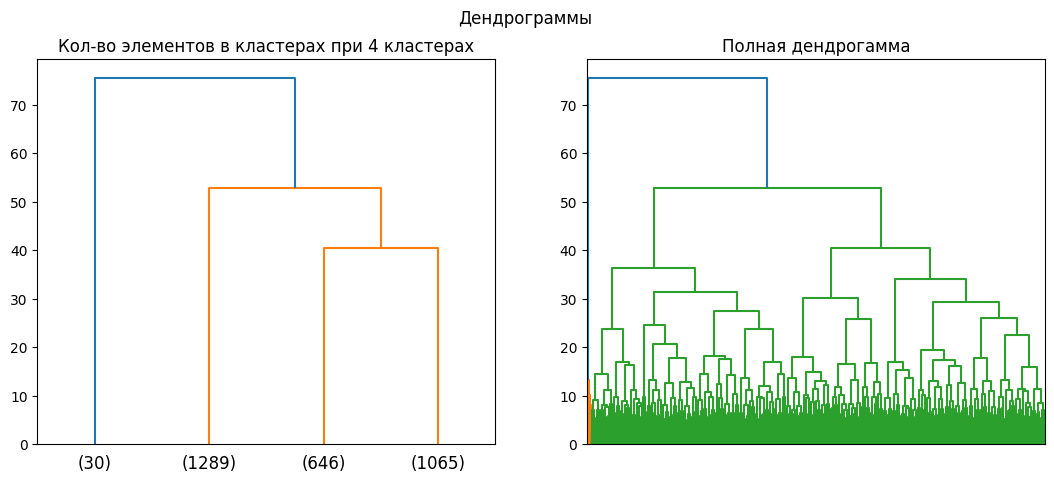

In [23]:
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(patients_df, method = 'ward')

# Визуализация дендрограммы
_, ax = plt.subplots(1,2, figsize=(13,5))
dendrogram(linked, p=4, truncate_mode="lastp", show_leaf_counts=True, ax=ax[0])
ax[0].set_title("Кол-во элементов в кластерах при 4 кластерах")
dendrogram(linked, no_labels=True, ax=ax[1])
ax[1].set_title("Полная дендрогамма")
plt.suptitle('Дендрограммы')
plt.show()

Можно увидеть, что кластер из 30 человек (кластер 3) сильно выражен, так как он образуется на ранних этапах и соединяется
с другим кластером только тогда, когда остаётся всего два кластера.

# Выводы
В ходе лабораторной работы была выполена кластеризация двух наборов данных с использованием двух методов — k средних и агломеративного.
Основные этапы работы включали предобработку данных, генерацию меток кластеров, обработку и визуализацию результатов.

В первой части использован синтетический датасет с заранее предусмотренным разделением на три кластера.
Датасет был разделён на два, три и четыре кластера методом k средних, было проведено сравнение результатов,
которое показало, что в данном случае самым лучшим будет разделение на три кластера.

Во второй части была выполнена кластеризация большого датасета с данными о пациентах и их статусе болезни. Наилучшим было выбрано разделение на 4 кластера, которое было выполнено при помощи двух моделей. По всем метрикам обе модели показали одинаково плохие результаты по классификации больных и здоровых, лишь метод k средних показал себя незначительно лучше. Для визуализации процесса агломеративной кластеризации были построены дендрограммы.

Проделанная работа позволила выявить ограничения моделей кластеризации при работе с реальными данными и продемонстрировала,
что выбор метода кластеризации и количества кластеров существенно зависит от структуры данных и поставленных задач.